# Investigating Fandango Movie Ratings

[Fandango](https://www.fandango.com/) is an online movie rating aggregator: in the past each movie could be voted with a rating ranging from 0 to 5 and the aggreagated mean vote was displayed with colored stars. <br>
In 2015 Walt Hickey [wrote an article](https://fivethirtyeight.com/features/fandango-movies-ratings/) about how the rating displayed as stars had been rounded, showing that the rating displayed was generally higher than the real vote, with rounding very questionable like 4.1 rounded to 4.5 instead of 4. <br>
This fact had a relevance, because Fandango was also a website for purchasing movies, not only for rating them. <br>
In this project I'll review ratings collected in 2016 in order to determine if there is any difference in ratings for popular movies between 2015 and the following year, in particular I'm interested in seeing if there is a general high rating trend for popular movies.<br>
At the moment of the writing of this document, Fandango doesn't show its own users' ratings anymore, it shows instead ratings from [Rotten Tomatoes](https://www.rottentomatoes.com/), another famous website for rating movies.
<br>
<br>
The original dataset are public on Github: <br>
[Walter Hickey 2015 data](https://github.com/fivethirtyeight/data/tree/master/fandango) <br>
[2016-2017 data](https://github.com/mircealex/Movie_ratings_2016_17)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The 2015 data

The data used for the Hickey's article contains movies that had a score on Rotten Tomatoes, Metacritic and IMDB and had at least 30 ratings on Fandango. I'll select a subset of the original data,  in particular:
- FILM (the name of the movie)
- Fandango_Stars (the stars rating on Fandango in 2015)
- Fandango_Ratingvalue (the real mean of the users'votes)
- Fandango_Difference (the difference betweenFandango_Stars and the actual Fandango_Ratingvalue)

In [2]:
fandango_2015 = pd.read_csv("fandango_score_comparison.csv")

In [3]:
fandango_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [4]:
df_2015 = fandango_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                        'Fandango_votes', "Fandango_Difference"]].copy()

In [5]:
df_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


The 2015 dataset doesn't have a year column, the year is included inside the title, I'll check if all the movies are from 2015.

In [6]:
df_2015["year"] = df_2015["FILM"].str.extract("(201\d)").astype(int)

In [7]:
df_2015["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

There are 17 movies from 2014, I'll considder only movies released in 2015.

In [8]:
df_15 = df_2015[df_2015['year'] == 2015].copy()
df_15.shape

(129, 6)

In [9]:
df_15.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


The dataset doesn't contain only movies from 2015, I'm going to select only movies from that year.

### The 2016-2017 Data

Data in the 2016-2017 dataset contain movies released in those years that had ratings on Rotten Tomatoes, Metacritic and IMDB with a significant number of votes.

In [10]:
ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [11]:
ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [12]:
ratings_16_17.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


I'll take the following columns from the 2016-2017 dataset: <br>
- movie(the name of the movie)
- year (the year released)
- fandango (the fandango rating)

In [13]:
df_16_17 = ratings_16_17[['movie', 'year', 'fandango']].copy()

In [14]:
df_16_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

The movies from 2017 are only a minority of the dataset, I'm going to select only movies from 2016, so I can compare two movie seasons.

In [15]:
df_16 = df_16_17[df_16_17['year'] == 2016]

In [16]:
df_16.shape

(191, 3)

In [17]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     191 non-null    object 
 1   year      191 non-null    int64  
 2   fandango  191 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


The data in the two datasets aren't completely comparable: they refer to two different periods and are chosen with different criteria, the most relevant of which is popularity, defined as a minimum number of 30 ratings for the 2015 dataset and simply as "significant" for the 2016-2017 dataset. <br>
This analysis has a limit in the possibility of being conclusive: even if I'd found that 2016-2017 movies had less high votes, this couldn't be completely attributed to the rating system, because any difference could be simply be attributed to the fact that the scores are referred to different movies and maybe the 2016-2017 movie season could have been very different from the 2015 one (some years have better or more popular movies than others). <br>
So in the end this analysis cannot find the "cause" of any change of the Fandango ratings, but it still could show if there are any differences between the two datasets.


### Difference Between Real Scores and Stars in 2015

The graph below show the difference between the stars showed on the website and the real user ratings. It is clear that the distribution of stars is clearly shifted to the right, towards higher votes. 

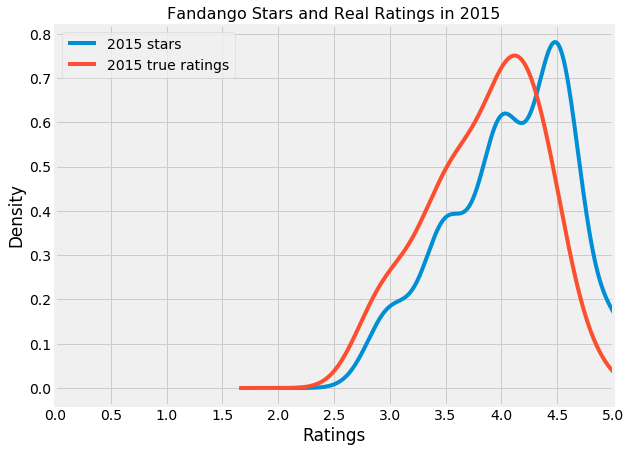

In [18]:
plt.figure(figsize=(10, 7))
plt.style.use('fivethirtyeight')
df_15['Fandango_Stars'].plot.kde(label="2015 stars", legend=True);
df_15['Fandango_Ratingvalue'].plot.kde(label="2015 true ratings", 
                                       legend=True)
plt.title("Fandango Stars and Real Ratings in 2015", size=16)
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel("Ratings")
plt.show();

True rating, in green, have a peak at about 4 in this dataset.

### Difference Between Stars in 2015 and User Ratings in 2016

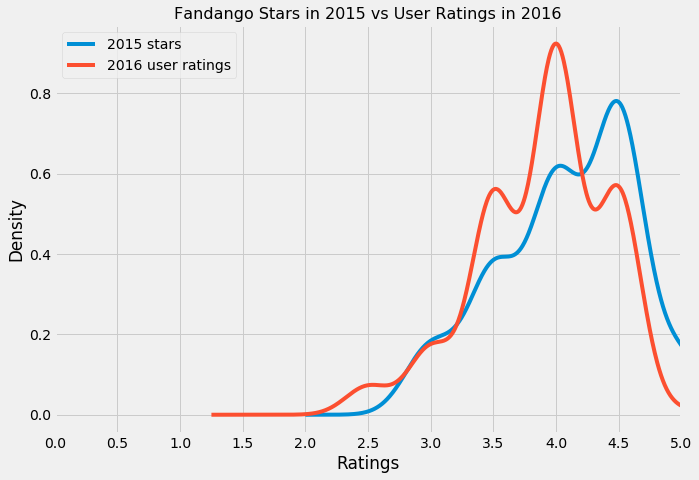

In [19]:
plt.figure(figsize=(10, 7))
plt.style.use('fivethirtyeight')
df_15['Fandango_Stars'].plot.kde(label="2015 stars", legend=True);
df_16['fandango'].plot.kde(label="2016 user ratings", 
                                       legend=True)
plt.title("Fandango Stars in 2015 vs User Ratings in 2016", size=16)
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel("Ratings")
plt.show();

Like the true ratings of 2015, the user ratings in 2016 are shifted to the left respect to the 2016 stars, towards lower values, with a mode at around 4. <br>
The 2015 stars distributiona and the 2016 user ratings distribution look quite different, with a lower frequency of high ratings in 2016 and and higher frequency of ratings around 3.5 in the same year respect to 2015. <br>
Very low ratings are not very frequent in 2016, but they are still more present than in 2015.

### Comparing Relative Frequencies

To have a better idea of the numerical differences between stars in 2015 and user ratings in 2016, let's look to frequency tables of the two distributions.

In [20]:
df_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [21]:
df_16["fandango"].value_counts(normalize=True).sort_index()* 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at numbers, there is a clear difference between 2015 and 2016 data. <br>
The minimum value in 2015 is 3, while in 2016 ratings start from 2.5. <br>
About 7% of stars in 2015 were the maximum vote of 5 stars, while in 2016 only 0.5% of votes were 5. <br>
The more frequent vote in 2015 is 4.5 (38%), while it si 4 in 2016 (40.3%).

### Determining the Direction of the Change

In [22]:
stars_2015_mean = df_15["Fandango_Stars"].mean()
stars_2015_mean 

4.0852713178294575

In [23]:
ratings_2016_mean = df_16["fandango"].mean()
ratings_2016_mean 

3.887434554973822

In [24]:
stars_2015_median = df_15["Fandango_Stars"].median()
stars_2015_median

4.0

In [25]:
ratings_2016_median = df_16["fandango"].median()
ratings_2016_median

4.0

In [26]:
stars_2015_mode = df_15["Fandango_Stars"].mode()[0]
stars_2015_mode 

4.5

In [27]:
ratings_2016_mode = df_16["fandango"].mode()[0]
ratings_2016_mode

4.0

In [28]:
fandango_stats = pd.DataFrame(index = ["mean", "median", "mode"])

In [29]:
fandango_stats["2015"] = [stars_2015_mean,stars_2015_median, stars_2015_mode  ]

In [30]:
fandango_stats["2016"] = [ratings_2016_mean,ratings_2016_median,ratings_2016_mode ]

In [31]:
fandango_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


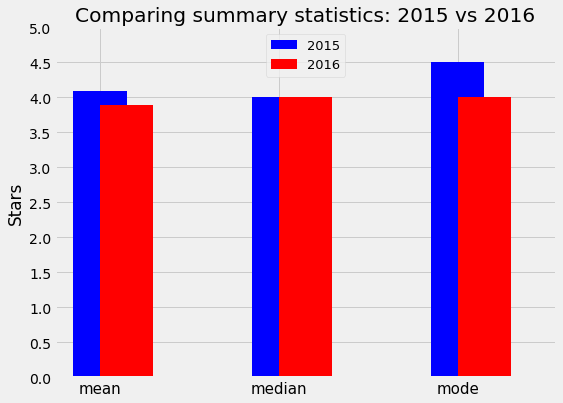

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
fandango_stats["2015"].plot.bar(align="center", color="blue", label = "2015", width=0.3)
fandango_stats["2016"].plot.bar(align = "edge", color = "red", width = 0.3)
plt.legend(loc="upper center", fontsize=13)
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5.5, 0.5))
plt.xticks(rotation= 360, size = 15)
plt.title("Comparing summary statistics: 2015 vs 2016")
plt.ylabel("Stars")
plt.show()

### Conclusions

The mean and mode for the 2015 distribution are slightly higher than the 2016 one, while the median is the same for both distributions. Visually and numerically we can confirm the ratings are higher for the 2015 distribution. <br>
It is still impossible to say with absolute certainty if this change is a consequence of a more truthful display of data or simply a real difference in the ratings of the two set of movies (correlation is still not causation). <br>
It is instead a real fact that in 2015 the distribution of real ratings and the ones displayed on Fandango were different. <br>
However our intuition, not supported by proofs, says that good articles about statistics may sometime turn to be useful in pushing towards virtuous behavior other statisticians working at movie websites.


